In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 


In [2]:
df=pd.read_csv(r"C:\Users\gauta\Downloads\spotify_tracks (1).csv")

In [3]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

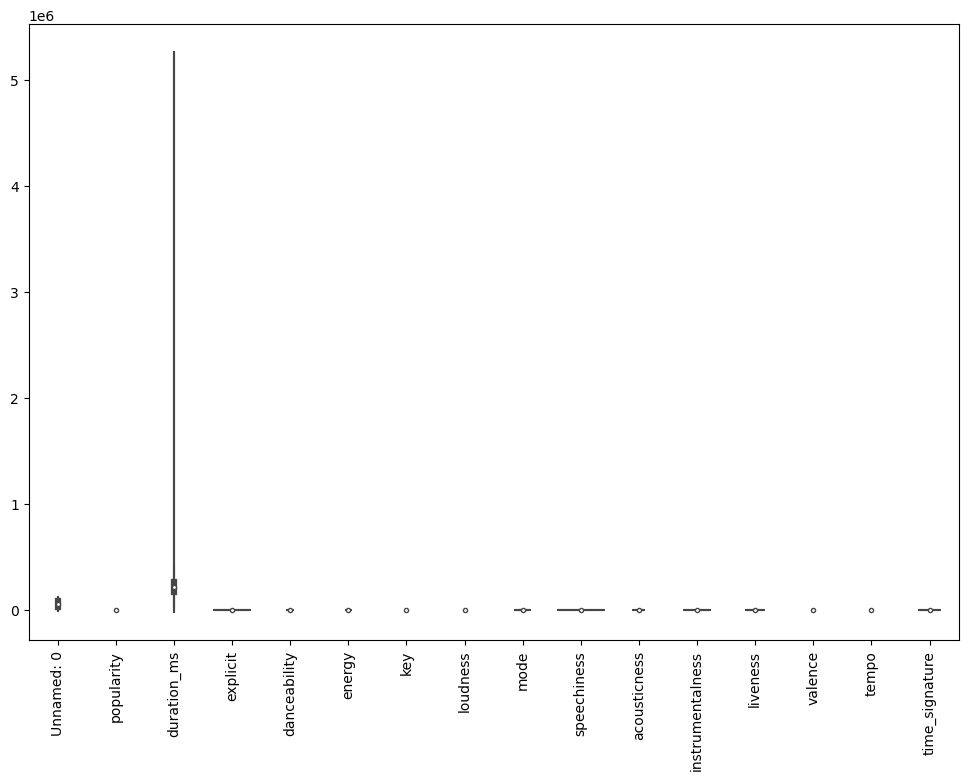

In [4]:
# Plot violin plots for all numerical features
plt.figure(figsize=(12, 8))
sns.violinplot(data=df)
plt.xticks(rotation=90)
plt.show()


C:\Users\gauta\AppData\Local\Temp\ipykernel_680\3154667488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


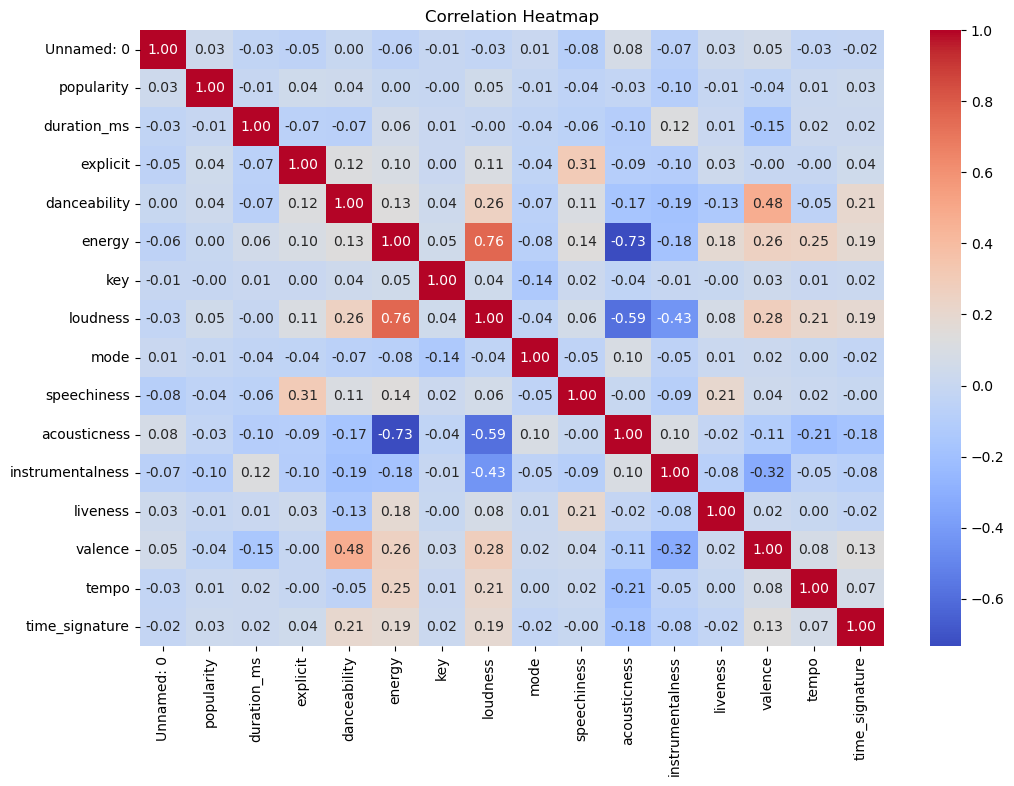

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


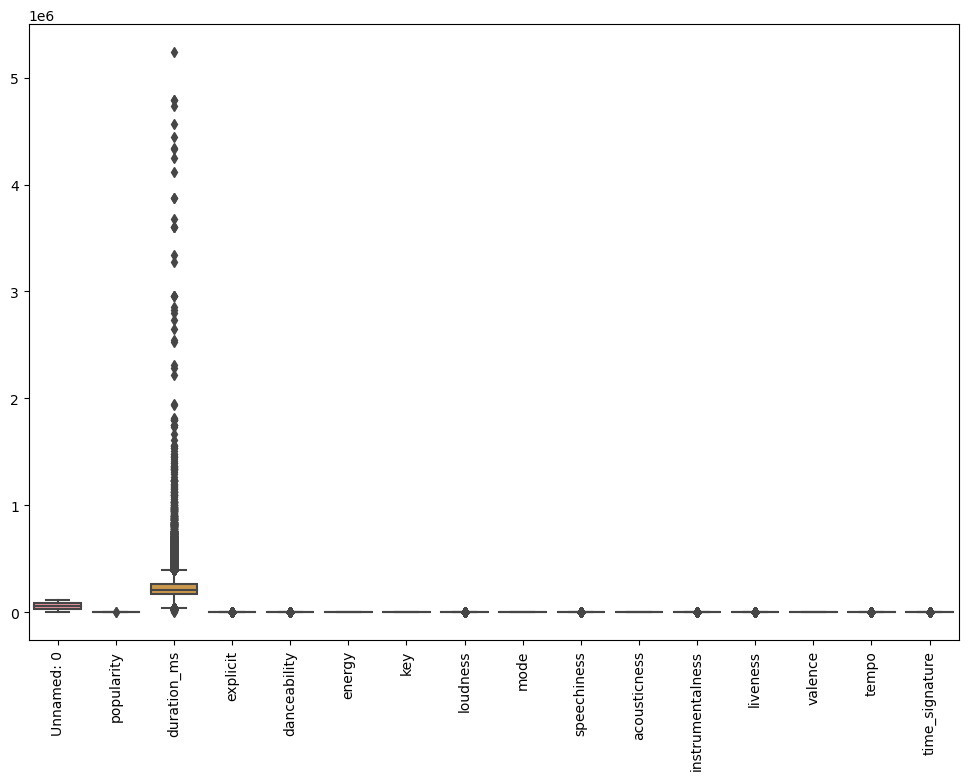

In [6]:
import seaborn as sns

# Plot box plots for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


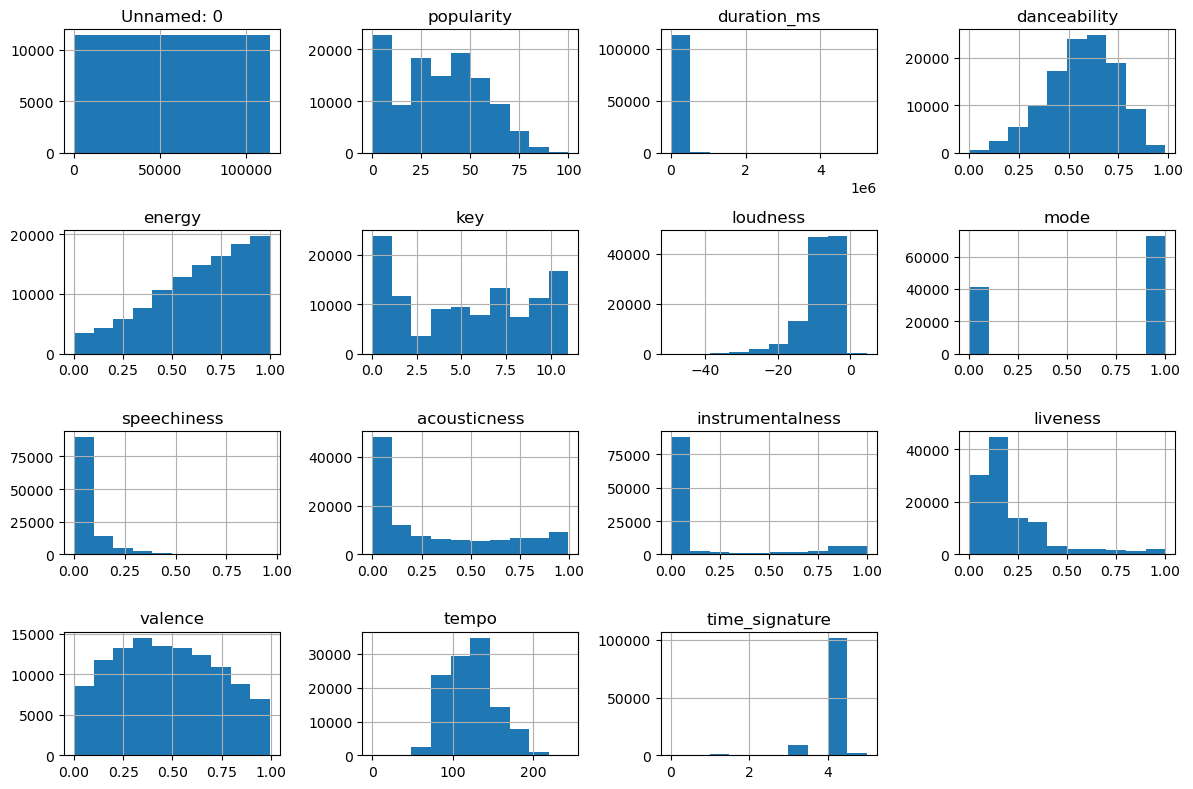

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()



In [8]:
df=df.dropna()


In [9]:
df=df.drop_duplicates(
subset=['artists','track_name'],
keep='first').reset_index(drop=True)


C:\Users\gauta\AppData\Local\Temp\ipykernel_680\3154667488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


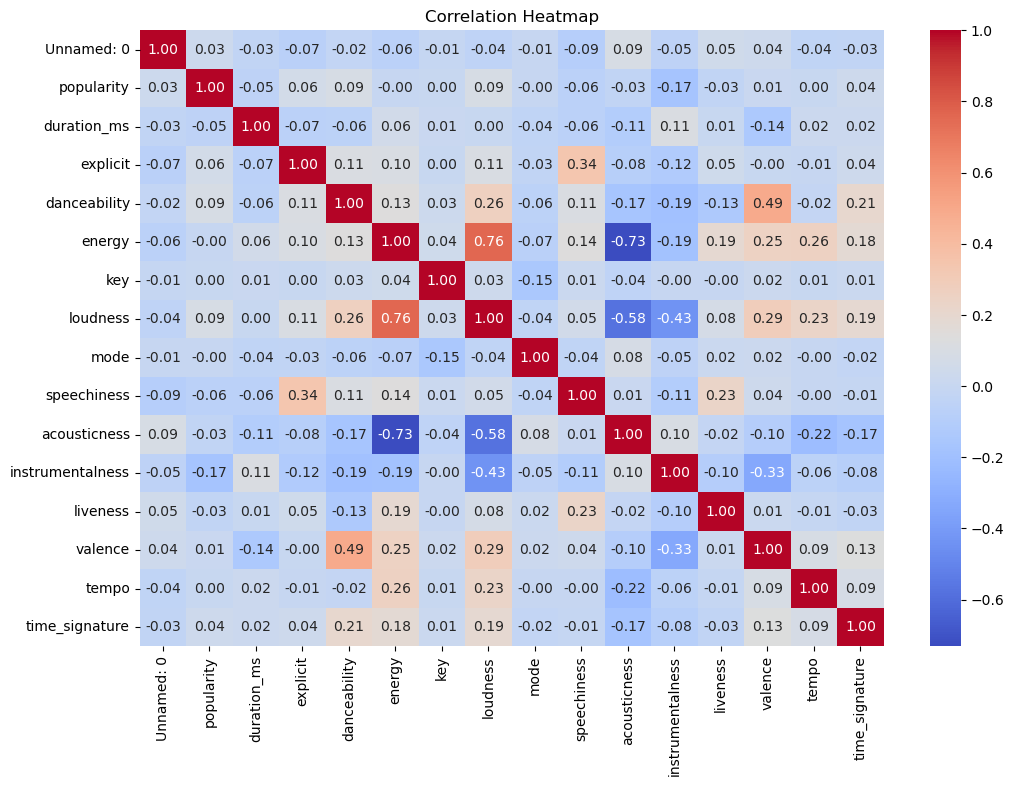

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
genres=[
    'anime',
    'pop',
    'k-pop',
    'hip-hop',
    'edm',
    'rock',
    'country',
    'chill',
    'r-n-b',
    'dance',
    'jazz',
    'study',
    'electronic',
    'spanish'
    
]

In [12]:
fig=make_subplots(rows=4,cols=4,vertical_spacing=0.16,subplot_titles=genres)
row=1
col=1
for genre in genres:
    top_artists = df.query('track_genre == @genre')
    top_artists = top_artists.groupby( by='artists').mean().sort_values('popularity', ascending=False)
    top_artists=top_artists.loc[~top_artists.index.str.contains(';')]
    top_artists=top_artists.head(10)
    
    fig.add_trace(
    go.Bar(name=genre,x=top_artists.index,y=top_artists['popularity']),
    row=row,col=col)
    col+=1
    if(col==5):
        col=1
        row+=1
        
    fig.update_layout(height=2000,width=1000,title_text="10 Most popular artists in specific genres by Avg popularity")
fig.show()

C:\Users\gauta\AppData\Local\Temp\ipykernel_680\4103383553.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\gauta\AppData\Local\Temp\ipykernel_680\4103383553.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\gauta\AppData\Local\Temp\ipykernel_680\4103383553.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\gauta\AppData\Local\Temp\ipykernel_680\4103383553.py:6: FutureWarning:

The def

In [13]:
genre_popularity=df.groupby('track_genre')['popularity'].mean()
genre_popularity_sorted=genre_popularity.sort_values(ascending=False)
top_genres=genre_popularity_sorted.head(20)

In [14]:
print(df.columns)



Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


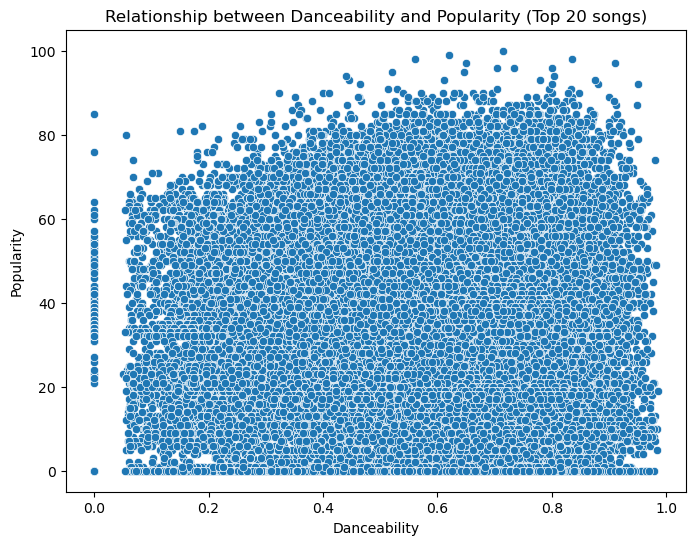

In [15]:

#scatter plot to visualize the relationship between dancebiltiy and populrity of top 20 songs
danceability = df['danceability']
popularity = df['popularity']

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=danceability, y=popularity)
plt.title("Relationship between Danceability and Popularity (Top 20 songs)")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()


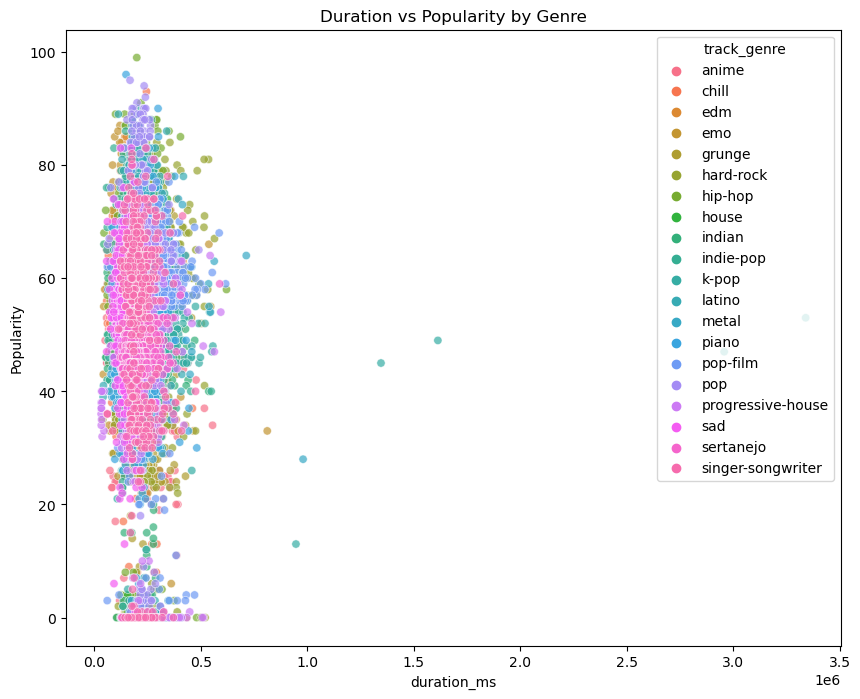

In [16]:


plt.figure(figsize=(10, 8))
sns.scatterplot(x='duration_ms', y='popularity', hue='track_genre',
                data=df[df['track_genre'].isin(top_genres.index)], alpha=0.7, palette='husl')
plt.title("Duration vs Popularity by Genre")
plt.xlabel("duration_ms")
plt.ylabel("Popularity")
plt.show()
